## encode image


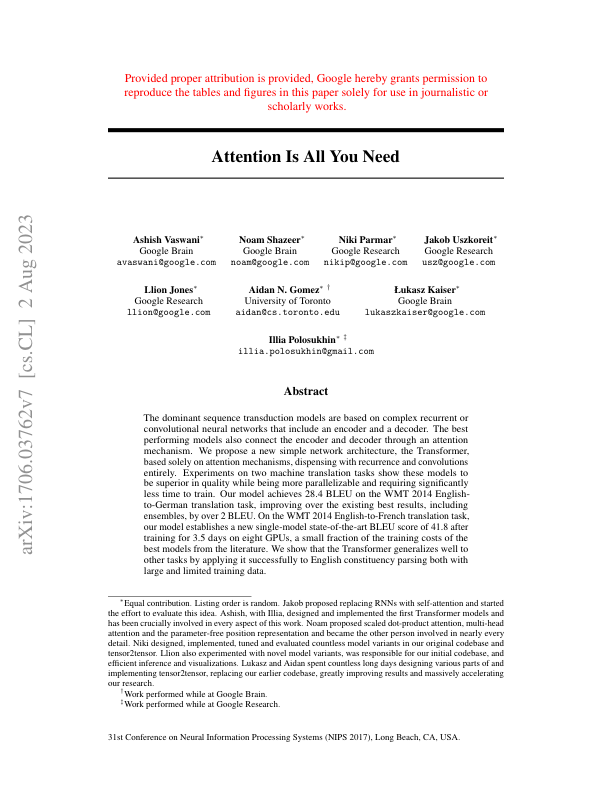

In [5]:
import fitz
from PIL import Image
from io import BytesIO

doc = fitz.open("attention.pdf")
page = doc.load_page(0)
pix = page.get_pixmap()
buffered = BytesIO()
Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

In [7]:
import base64

Image.frombytes("RGB", [pix.width, pix.height], pix.samples).save(
    buffered, format="PNG"
)
image_base64 = base64.b64encode(buffered.getvalue()).decode("utf-8")

## extract


In [6]:
from openai import OpenAI

# Set the API key and model name
model = "gpt-4o"
client = OpenAI(api_key="YOUR_API_KEY")

In [8]:
extract_prompt = {
    "role": "system",
    "content": "You are a helpful assistant.",
}

user_extract_message = {
    "role": "user",
    "content": [
        {
            "type": "text",
            "text": "Extract the text from the following image. Try to keep the same formatting you see in the image, such as tables and lists. Only return the extracted text in your response, don't include anything else.",
        },
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/png;base64,{image_base64}"},
        },
    ],
}

extract_response = client.chat.completions.create(
    model=model,
    messages=[extract_prompt, user_extract_message],
    temperature=0.0,
)
extracted_text = extract_response.choices[0].message.content.strip()

extracted_text

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\n\nAttention Is All You Need\n\nAshish Vaswani*  \nGoogle Brain  \navaswani@google.com\n\nNoam Shazeer*  \nGoogle Brain  \nnoam@google.com\n\nNiki Parmar*  \nGoogle Research  \nnikip@google.com\n\nJakob Uszkoreit*  \nGoogle Research  \nusz@google.com\n\nLlion Jones*  \nGoogle Research  \nllion@google.com\n\nAidan N. Gomez* †  \nUniversity of Toronto  \naidan@cs.toronto.edu\n\nLukasz Kaiser*  \nGoogle Brain  \nlukaszkaiser@google.com\n\nIllia Polosukhin* †  \nillia.polosukhin@gmail.com\n\nAbstract\n\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased sole

## translate


In [10]:
target_language = "Chinese (Traditional)"

translate_prompt = {
    "role": "system",
    "content": "You are an expert translator.",
}
user_translate_message = {
    "role": "user",
    "content": f"""
    Translate the following text to {target_language}. Follow these guidelines:

    1. **Translate all text.** Ensure the translation is entirely in {target_language} and does not contain any English.
    2. **Translate technical terms and jargon accurately.** Ensure that specialized terminology is translated appropriately within the context.
    3. **Retain the context and tone of the original text.** Make sure the translation is contextually appropriate and retains the original meaning and tone.
    4. **Verify the accuracy of the translation.** Double-check the translation to ensure it is free from errors and accurately represents the source text.
    \n\n{extracted_text}""",
}

translate_response = client.chat.completions.create(
    model=model,
    messages=[translate_prompt, user_translate_message],
    temperature=0.0,
)
translated_text = translate_response.choices[0].message.content.strip()
translated_text

'在提供適當的歸屬後，Google特此授權僅用於新聞或學術作品中再現本文中的表格和圖表。\n\n注意力是你所需要的全部\n\nAshish Vaswani*  \nGoogle Brain  \navaswani@google.com\n\nNoam Shazeer*  \nGoogle Brain  \nnoam@google.com\n\nNiki Parmar*  \nGoogle Research  \nnikip@google.com\n\nJakob Uszkoreit*  \nGoogle Research  \nusz@google.com\n\nLlion Jones*  \nGoogle Research  \nllion@google.com\n\nAidan N. Gomez* †  \n多倫多大學  \naidan@cs.toronto.edu\n\nLukasz Kaiser*  \nGoogle Brain  \nlukaszkaiser@google.com\n\nIllia Polosukhin* †  \nillia.polosukhin@gmail.com\n\n摘要\n\n主流的序列轉換模型基於複雜的循環或卷積神經網絡，這些網絡包括編碼器和解碼器。表現最好的模型還通過注意力機制將編碼器和解碼器連接起來。我們提出了一種新的簡單網絡架構，Transformer，完全基於注意力機制，完全摒棄了循環和卷積。在兩個機器翻譯任務上的實驗表明，這些模型在質量上優於現有模型，同時具有更高的並行性，並且訓練時間顯著減少。我們的模型在WMT 2014英語到德語翻譯任務中達到了28.4的BLEU分數，比現有的最佳結果（包括集成模型）提高了超過2個BLEU分。在WMT 2014英語到法語翻譯任務中，我們的模型在八個GPU上訓練3.5天後，創造了新的單模型最先進的BLEU分數41.8，訓練成本僅為文獻中最佳模型的一小部分。我們通過成功應用於英語句法分析任務，無論是大規模還是有限的訓練數據，證明了Transformer在其他任務中的良好泛化能力。\n\n*同等貢獻。列出順序是隨機的。Jakob提出用自注意力取代RNN，並開始評估這一想法的工作。Ashish與Illia一起設計並實現了第一個Transformer模型，並在這項工作的每個方面都至關重要。No